# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [ ]:
train_df.head()

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [3]:
final_df=pd.concat([train_df,test_df],axis=0,sort = False)

In [ ]:
final_df.shape

In [ ]:
final_df.head()

In [ ]:
final_df.info()

In [ ]:
final_df.isnull().sum()

In [4]:
final_df['SalePrice'].head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [5]:
final_df.drop(['Alley'],axis=1,inplace=True)
final_df.drop(['FireplaceQu'],axis=1,inplace=True)
final_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [6]:
final_df['LotFrontage']=final_df['LotFrontage'].fillna(final_df['LotFrontage'].mean())
final_df['MasVnrArea']=final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].mean())
final_df['BsmtFinSF1']=final_df['BsmtFinSF1'].fillna(final_df['BsmtFinSF1'].mean())
final_df['BsmtFinSF2']=final_df['BsmtFinSF2'].fillna(final_df['BsmtFinSF2'].mean())
final_df['BsmtUnfSF']=final_df['BsmtUnfSF'].fillna(final_df['BsmtUnfSF'].mean())
final_df['TotalBsmtSF']=final_df['TotalBsmtSF'].fillna(final_df['TotalBsmtSF'].mean())
final_df['BsmtFullBath']=final_df['BsmtFullBath'].fillna(final_df['BsmtFullBath'].mean())
final_df['BsmtHalfBath']=final_df['BsmtHalfBath'].fillna(final_df['BsmtHalfBath'].mean())
final_df['GarageYrBlt']=final_df['GarageYrBlt'].fillna(final_df['GarageYrBlt'].mean())
final_df['GarageCars']=final_df['GarageCars'].fillna(final_df['GarageCars'].mean())
final_df['GarageArea']=final_df['GarageArea'].fillna(final_df['GarageArea'].mean())





In [7]:
final_df['MSZoning']=final_df['MSZoning'].fillna(final_df['MSZoning'].mode()[0])
final_df['Utilities']=final_df['Utilities'].fillna(final_df['Utilities'].mode()[0])
final_df['Exterior1st']=final_df['Exterior1st'].fillna(final_df['Exterior1st'].mode()[0])
final_df['Exterior2nd']=final_df['Exterior2nd'].fillna(final_df['Exterior2nd'].mode()[0])
final_df['MasVnrType']=final_df['MasVnrType'].fillna(final_df['MasVnrType'].mode()[0])
final_df['BsmtQual']=final_df['BsmtQual'].fillna(final_df['BsmtQual'].mode()[0])
final_df['BsmtCond']=final_df['BsmtCond'].fillna(final_df['BsmtCond'].mode()[0])
final_df['BsmtExposure']=final_df['BsmtExposure'].fillna(final_df['BsmtExposure'].mode()[0])
final_df['BsmtFinType1']=final_df['BsmtFinType1'].fillna(final_df['BsmtFinType1'].mode()[0])
final_df['BsmtFinType2']=final_df['BsmtFinType2'].fillna(final_df['BsmtFinType2'].mode()[0])
final_df['Electrical']=final_df['Electrical'].fillna(final_df['Electrical'].mode()[0])
final_df['KitchenQual']=final_df['KitchenQual'].fillna(final_df['KitchenQual'].mode()[0])
final_df['Functional']=final_df['Functional'].fillna(final_df['Functional'].mode()[0])
final_df['GarageType']=final_df['GarageType'].fillna(final_df['GarageType'].mode()[0])
final_df['GarageFinish']=final_df['GarageFinish'].fillna(final_df['GarageFinish'].mode()[0])
final_df['GarageQual']=final_df['GarageQual'].fillna(final_df['GarageQual'].mode()[0])
final_df['GarageCond']=final_df['GarageCond'].fillna(final_df['GarageCond'].mode()[0])
final_df['SaleType']=final_df['SaleType'].fillna(final_df['SaleType'].mode()[0])





In [8]:
final_df.shape

(2919, 76)

In [9]:
final_df.drop(['Id'],axis=1,inplace=True)

In [10]:
final_df.shape

(2919, 75)

In [ ]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
final_df.corr()

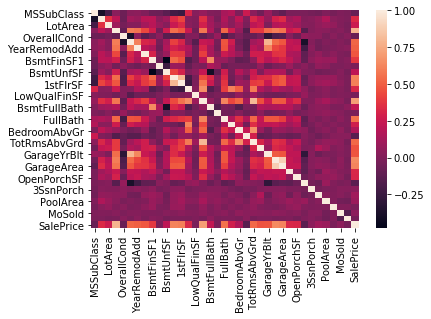

In [11]:
sns.heatmap(final_df.corr())

# Handling Categorical Variables

In [12]:
cat_var = [var for var in final_df.columns if final_df[var].dtypes == 'O']
cat_var

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [13]:
len(cat_var)

38

In [14]:
final_df.shape

(2919, 75)

In [34]:
def category_onehot_multcols(cat_features):
    df_fin=final_df
    i=0
    for fields in cat_features:
        
        print(fields)
        
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            df_fin=df1.copy()
        else:
            
            df_fin=pd.concat([df_fin,df1],axis=1)
        
        i=i+1
       
        
    df_fin=pd.concat([final_df,df_fin],axis=1)
        
    return df_fin

In [35]:
final_df=category_onehot_multcols(cat_var)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [36]:
final_df.shape

(2919, 233)

In [37]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [38]:
final_df.shape

(2919, 177)

# Train Test split ,Feature Scaling, Applying PCA

In [39]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [40]:
df_Train.head()
df_Train.shape

(1460, 177)

In [ ]:
df_Test.head()

In [ ]:
df_Test['SalePrice']

In [ ]:
df_Train['SalePrice']

In [41]:
df_Test.drop(['SalePrice'],axis=1, inplace = True)

C:\Users\sethi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
df_Test.shape

(1459, 176)

In [43]:
df_Train.shape

(1460, 177)

In [44]:
type(df_Train)

pandas.core.frame.DataFrame

In [45]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [47]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

Now we will scale the data

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [58]:
X_train = sc.fit_transform(X_train)
df_Test = sc.transform(df_Test)

C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sethi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [59]:
type(X_train)

numpy.ndarray

In [ ]:
type(df_Test)

In [60]:
df_Test.shape

(1459, 176)

In [61]:
X_train.shape

(1460, 176)

Now lets apply PCA

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca1 = PCA(n_components = None)
X_train = pca1.fit_transform(X_train)
df_Test = pca1.transform(df_Test)


In [ ]:
explained_variance = pca1.explained_variance_ratio_
print(explained_variance)


In [ ]:
type(explained_variance)

In [ ]:
%matplotlib inline

In [ ]:
plt.hist(explained_variance,bins = 50)

In [ ]:
main_feat = explained_variance[explained_variance > 0.0035]

In [ ]:
len(main_feat)

In [ ]:
main_feat.sum()

In [ ]:
X_train.shape

Now we will select 103 most imp features 

In [ ]:
pca = PCA(n_components = 105)
X_train = pca.fit_transform(X_train)
df_Test = pca.transform(df_Test)

In [ ]:
X_train.shape

In [ ]:
df_Test.shape

# Prediction using Machine Learning Algorithm

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
#Hyper Parameter Tuning
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs =-1,
            verbose = 5, 
            return_train_score = True,
            random_state=0)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_params_

In [ ]:
classifier=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=1100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
#fitting the model on data set
classifier.fit(X_train,y_train)

# Artificial Neural Network Implementation

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



In [64]:
X_train.shape

(1460, 176)

In [65]:
df_Test.shape

(1459, 176)

In [80]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 176))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 40, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss='mean_squared_logarithmic_error', optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=176, units=50, kernel_initializer="he_uniform")`
  """
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="he_uniform")`
  
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `e

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 0s 268us/step - loss: 94.5952 - val_loss: 72.2448
Epoch 2/1000
1168/1168 [==============================] - 0s 110us/step - loss: 60.3297 - val_loss: 51.7485
Epoch 3/1000
1168/1168 [==============================] - 0s 117us/step - loss: 44.6374 - val_loss: 39.8505
Epoch 4/1000
1168/1168 [==============================] - 0s 110us/step - loss: 34.8066 - val_loss: 31.8717
Epoch 5/1000
1168/1168 [==============================] - 0s 118us/step - loss: 27.9584 - val_loss: 26.0823
Epoch 6/1000
1168/1168 [==============================] - 0s 114us/step - loss: 22.8771 - val_loss: 21.6640
Epoch 7/1000
1168/1168 [==============================] - 0s 118us/step - loss: 18.9485 - val_loss: 18.1798
Epoch 8/1000
1168/1168 [==============================] - 0s 113us/step - loss: 15.8228 - val_loss: 15.3581
Epoch 9/1000
1168/1168 [==============================] - 0s 116us/step - loss: 13.2783 -

1168/1168 [==============================] - 0s 192us/step - loss: 0.0098 - val_loss: 0.4925
Epoch 78/1000
1168/1168 [==============================] - 0s 182us/step - loss: 0.0095 - val_loss: 0.4899
Epoch 79/1000
1168/1168 [==============================] - 0s 177us/step - loss: 0.0093 - val_loss: 0.4883
Epoch 80/1000
1168/1168 [==============================] - 0s 178us/step - loss: 0.0091 - val_loss: 0.4869
Epoch 81/1000
1168/1168 [==============================] - 0s 187us/step - loss: 0.0089 - val_loss: 0.4849
Epoch 82/1000
1168/1168 [==============================] - 0s 188us/step - loss: 0.0087 - val_loss: 0.4840
Epoch 83/1000
1168/1168 [==============================] - 0s 178us/step - loss: 0.0085 - val_loss: 0.4833
Epoch 84/1000
1168/1168 [==============================] - 0s 171us/step - loss: 0.0084 - val_loss: 0.4788
Epoch 85/1000
1168/1168 [==============================] - 0s 173us/step - loss: 0.0082 - val_loss: 0.4789
Epoch 86/1000
1168/1168 [==========================

Epoch 229/1000
1168/1168 [==============================] - 0s 181us/step - loss: 0.0016 - val_loss: 0.0363
Epoch 230/1000
1168/1168 [==============================] - 0s 166us/step - loss: 0.0016 - val_loss: 0.0361
Epoch 231/1000
1168/1168 [==============================] - 0s 192us/step - loss: 0.0016 - val_loss: 0.0356
Epoch 232/1000
1168/1168 [==============================] - 0s 178us/step - loss: 0.0016 - val_loss: 0.0355
Epoch 233/1000
1168/1168 [==============================] - 0s 171us/step - loss: 0.0016 - val_loss: 0.0351
Epoch 234/1000
1168/1168 [==============================] - 0s 166us/step - loss: 0.0016 - val_loss: 0.0350
Epoch 235/1000
1168/1168 [==============================] - 0s 185us/step - loss: 0.0016 - val_loss: 0.0343
Epoch 236/1000
1168/1168 [==============================] - 0s 171us/step - loss: 0.0015 - val_loss: 0.0342
Epoch 237/1000
1168/1168 [==============================] - 0s 171us/step - loss: 0.0015 - val_loss: 0.0338
Epoch 238/1000
1168/1168 [==

1168/1168 [==============================] - ETA: 0s - loss: 5.2917e-0 - 0s 188us/step - loss: 5.0650e-04 - val_loss: 0.0453
Epoch 378/1000
1168/1168 [==============================] - 0s 175us/step - loss: 5.1279e-04 - val_loss: 0.0457
Epoch 379/1000
1168/1168 [==============================] - 0s 182us/step - loss: 5.0731e-04 - val_loss: 0.0459
Epoch 380/1000
1168/1168 [==============================] - 0s 181us/step - loss: 5.0524e-04 - val_loss: 0.0463
Epoch 381/1000
1168/1168 [==============================] - 0s 185us/step - loss: 5.0258e-04 - val_loss: 0.0463
Epoch 382/1000
1168/1168 [==============================] - 0s 175us/step - loss: 4.9266e-04 - val_loss: 0.0464
Epoch 383/1000
1168/1168 [==============================] - 0s 164us/step - loss: 5.0158e-04 - val_loss: 0.0467
Epoch 384/1000
1168/1168 [==============================] - 0s 168us/step - loss: 4.8588e-04 - val_loss: 0.0468
Epoch 385/1000
1168/1168 [==============================] - 0s 168us/step - loss: 4.9872e-0

1168/1168 [==============================] - 0s 171us/step - loss: 3.4742e-04 - val_loss: 0.0604
Epoch 451/1000
1168/1168 [==============================] - 0s 162us/step - loss: 3.3031e-04 - val_loss: 0.0606
Epoch 452/1000
1168/1168 [==============================] - 0s 166us/step - loss: 3.3418e-04 - val_loss: 0.0608-0
Epoch 453/1000
1168/1168 [==============================] - 0s 171us/step - loss: 3.2706e-04 - val_loss: 0.0610
Epoch 454/1000
1168/1168 [==============================] - 0s 172us/step - loss: 3.4537e-04 - val_loss: 0.0613
Epoch 455/1000
1168/1168 [==============================] - 0s 171us/step - loss: 3.3096e-04 - val_loss: 0.0616
Epoch 456/1000
1168/1168 [==============================] - 0s 163us/step - loss: 3.2249e-04 - val_loss: 0.0615
Epoch 457/1000
1168/1168 [==============================] - 0s 165us/step - loss: 3.3540e-04 - val_loss: 0.0618
Epoch 458/1000
1168/1168 [==============================] - 0s 181us/step - loss: 3.3432e-04 - val_loss: 0.0621
Epoch

1168/1168 [==============================] - 0s 168us/step - loss: 1.8560e-04 - val_loss: 0.0840
Epoch 597/1000
1168/1168 [==============================] - 0s 176us/step - loss: 1.8016e-04 - val_loss: 0.0843
Epoch 598/1000
1168/1168 [==============================] - 0s 174us/step - loss: 1.8805e-04 - val_loss: 0.0843
Epoch 599/1000
1168/1168 [==============================] - 0s 164us/step - loss: 1.8537e-04 - val_loss: 0.0843
Epoch 600/1000
1168/1168 [==============================] - 0s 165us/step - loss: 1.9250e-04 - val_loss: 0.0848
Epoch 601/1000
1168/1168 [==============================] - 0s 163us/step - loss: 1.8014e-04 - val_loss: 0.0849
Epoch 602/1000
1168/1168 [==============================] - 0s 173us/step - loss: 1.8288e-04 - val_loss: 0.0850
Epoch 603/1000
1168/1168 [==============================] - 0s 178us/step - loss: 1.8646e-04 - val_loss: 0.0852
Epoch 604/1000
1168/1168 [==============================] - 0s 169us/step - loss: 1.9151e-04 - val_loss: 0.0851
Epoch 6

1168/1168 [==============================] - 0s 178us/step - loss: 1.5400e-04 - val_loss: 0.0929
Epoch 670/1000
1168/1168 [==============================] - 0s 168us/step - loss: 1.5075e-04 - val_loss: 0.0928
Epoch 671/1000
1168/1168 [==============================] - 0s 174us/step - loss: 1.5968e-04 - val_loss: 0.0928
Epoch 672/1000
1168/1168 [==============================] - 0s 172us/step - loss: 1.5386e-04 - val_loss: 0.0930
Epoch 673/1000
1168/1168 [==============================] - 0s 166us/step - loss: 1.4553e-04 - val_loss: 0.0932
Epoch 674/1000
1168/1168 [==============================] - 0s 164us/step - loss: 1.4693e-04 - val_loss: 0.0935
Epoch 675/1000
1168/1168 [==============================] - 0s 166us/step - loss: 1.5537e-04 - val_loss: 0.0934
Epoch 676/1000
1168/1168 [==============================] - 0s 168us/step - loss: 1.4030e-04 - val_loss: 0.0936
Epoch 677/1000
1168/1168 [==============================] - 0s 169us/step - loss: 1.3522e-04 - val_loss: 0.0937
Epoch 6

1168/1168 [==============================] - 0s 185us/step - loss: 1.0836e-04 - val_loss: 0.1074
Epoch 816/1000
1168/1168 [==============================] - 0s 176us/step - loss: 9.6778e-05 - val_loss: 0.1075
Epoch 817/1000
1168/1168 [==============================] - 0s 164us/step - loss: 9.4981e-05 - val_loss: 0.1075
Epoch 818/1000
1168/1168 [==============================] - 0s 165us/step - loss: 9.3826e-05 - val_loss: 0.1077
Epoch 819/1000
1168/1168 [==============================] - 0s 181us/step - loss: 1.0131e-04 - val_loss: 0.1080
Epoch 820/1000
1168/1168 [==============================] - 0s 166us/step - loss: 9.4812e-05 - val_loss: 0.1079
Epoch 821/1000
1168/1168 [==============================] - 0s 178us/step - loss: 9.6204e-05 - val_loss: 0.1082
Epoch 822/1000
1168/1168 [==============================] - 0s 171us/step - loss: 9.8071e-05 - val_loss: 0.1081
Epoch 823/1000
1168/1168 [==============================] - 0s 166us/step - loss: 9.8901e-05 - val_loss: 0.1083
Epoch 8

1168/1168 [==============================] - 0s 188us/step - loss: 7.5012e-05 - val_loss: 0.1182
Epoch 962/1000
1168/1168 [==============================] - 0s 185us/step - loss: 7.7629e-05 - val_loss: 0.1180
Epoch 963/1000
1168/1168 [==============================] - 0s 168us/step - loss: 7.5399e-05 - val_loss: 0.1178
Epoch 964/1000
1168/1168 [==============================] - 0s 168us/step - loss: 7.4384e-05 - val_loss: 0.1183
Epoch 965/1000
1168/1168 [==============================] - 0s 174us/step - loss: 7.5700e-05 - val_loss: 0.1179
Epoch 966/1000
1168/1168 [==============================] - 0s 175us/step - loss: 7.7958e-05 - val_loss: 0.1180
Epoch 967/1000
1168/1168 [==============================] - 0s 168us/step - loss: 8.9040e-05 - val_loss: 0.1185
Epoch 968/1000
1168/1168 [==============================] - 0s 173us/step - loss: 7.8642e-05 - val_loss: 0.1183
Epoch 969/1000
1168/1168 [==============================] - 0s 165us/step - loss: 6.9226e-05 - val_loss: 0.1181
Epoch 9

In [81]:
ann_pred=classifier.predict(df_Test)

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [82]:
ann_pred.shape

(1459, 1)

In [83]:
ann_pred

array([[106652.61 ],
       [174326.05 ],
       [197132.83 ],
       ...,
       [204139.25 ],
       [101044.445],
       [243235.44 ]], dtype=float32)

In [84]:
pred=pd.DataFrame(ann_pred)
Id_df=pd.read_csv('sample_submission.csv')


In [85]:
final_sub=pd.concat([Id_df['Id'],pred],axis=1)


In [86]:
final_sub.columns=['Id','SalePrice']
final_sub.to_csv('submission_ann.csv',index=False)

In [87]:
final_sub

,Id,SalePrice
0,1461,1.066526e+05
1,1462,1.743260e+05
2,1463,1.971328e+05
3,1464,1.980031e+05
4,1465,2.352071e+05
5,1466,1.751555e+05
6,1467,1.681874e+05
7,1468,1.713944e+05
8,1469,1.717579e+05
9,1470,1.206936e+05


# Cross Validation 

In [72]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x000002E6183EEEB8> does not.

In [ ]:
df_Test.shape

In [ ]:
df_Test.describe()

In [ ]:
y_pred=classifier.predict(df_Test)

In [ ]:
y_pred

In [ ]:
len(y_pred)

In [ ]:
pred=pd.DataFrame(y_pred)
Id_df=pd.read_csv('sample_submission.csv')


In [ ]:
final_sub=pd.concat([Id_df['Id'],pred],axis=1)
final_sub

In [ ]:
final_sub.columns=['Id','SalePrice']
final_sub.to_csv('submission_PCA_105.csv',index=False)

In [ ]:
final_sub